In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob

from package.helpers import test_physical_lens
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [3]:
array_dir_grid = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'grid_oversampling')
array_dir_samples = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'num_samples')

figure_dir_grid = os.path.join(repo_path, 'figures', 'diagnostics', 'grid_oversampling')
figure_dir_samples = os.path.join(repo_path, 'figures', 'diagnostics', 'num_samples')

grid_list = glob(array_dir_grid + '/grid_oversampling_*.npy')
samples_list = glob(array_dir_samples + '/num_samples_*.npy')

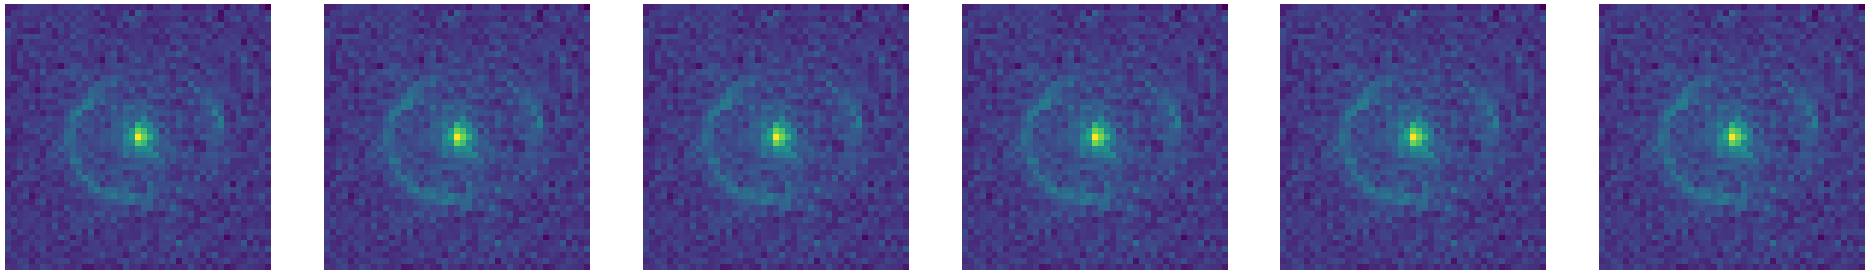

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=len(grid_list), figsize=(24, 4))

title_list = [os.path.basename(i) for i in grid_list]

for i, file in enumerate(grid_list):
    array = np.load(file)
    axis = ax[i].imshow(array)
    # ax[i].set_title(title_list[i])
    ax[i].set_axis_off()

# fig.colorbar(axis, ax=ax, ticks=[-0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1])

plt.savefig(os.path.join(figure_dir_grid, 'grid_oversampling.png'))
plt.show()

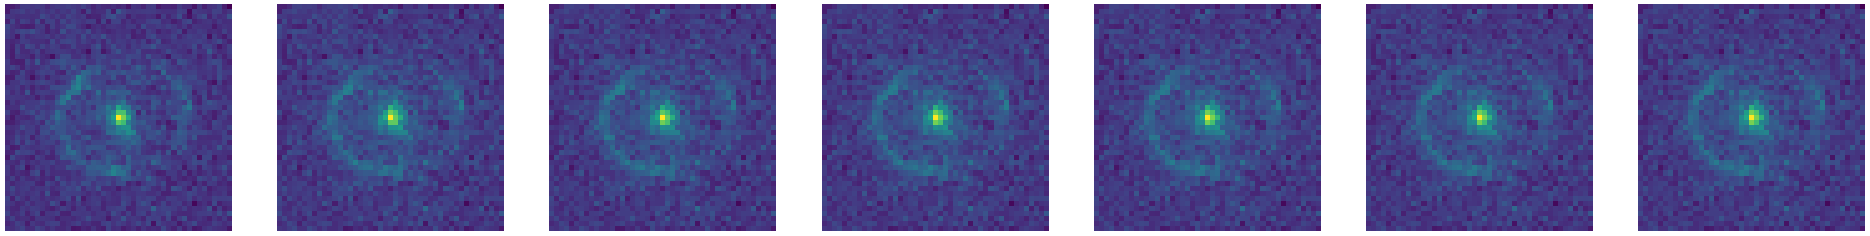

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=len(samples_list), figsize=(24, 4))

title_list = [os.path.basename(i) for i in samples_list]

for i, file in enumerate(samples_list):
    array = np.load(file)
    axis = ax[i].imshow(array)
    # ax[i].set_title(title_list[i])
    ax[i].set_axis_off()

# fig.colorbar(axis, ax=ax, ticks=[-0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1])

plt.savefig(os.path.join(figure_dir_samples, 'num_samples.png'))
plt.show()

In [6]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [7]:
execution_times_grid = np.load(os.path.join(array_dir_grid, 'execution_times_grid_oversampling.npy'))
print(execution_times_grid)

execution_times_grid = [get_sec(i) for i in execution_times_grid]
print(execution_times_grid)

['0:02:08' '0:11:36' '0:22:48' '0:34:13' '0:44:37' '0:53:12']
[128, 696, 1368, 2053, 2677, 3192]


In [8]:
point_source_count_grid = np.load(os.path.join(array_dir_grid, 'point_source_count_grid_oversampling.npy'))
print(point_source_count_grid)

[ 1919 10653 20958 31422 41090 49505]


Text(0, 0.5, 'Point sources')

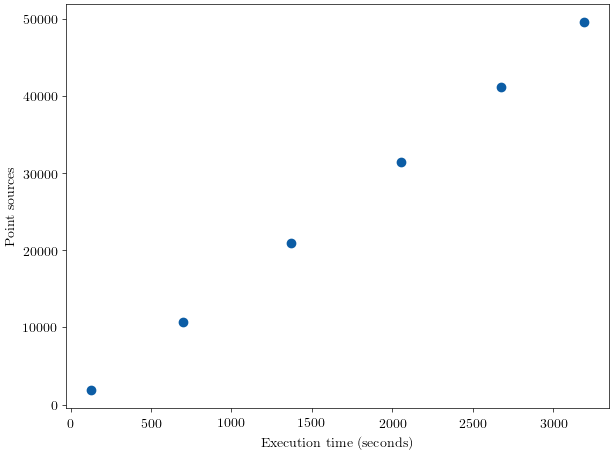

In [26]:
plt.scatter(execution_times_grid, point_source_count_grid)
plt.xlabel('Execution time (seconds)')
plt.ylabel('Point sources')

In [11]:
execution_times_samples = np.load(os.path.join(array_dir_samples, 'execution_times_num_samples.npy'))
print(execution_times_samples)

execution_times_samples = [get_sec(i) for i in execution_times_samples]
print(execution_times_samples)

['0:01:20' '0:06:05' '0:11:14' '0:36:57' '0:56:29' '1:44:56' '2:11:17']
[80, 365, 674, 2217, 3389, 6296, 7877]


In [12]:
point_source_count_samples = np.load(os.path.join(array_dir_samples, 'point_source_count_num_samples.npy'))
print(point_source_count_samples)

[  986  4566  8459 27806 41090 79106 99435]


Text(0, 0.5, 'Point sources')

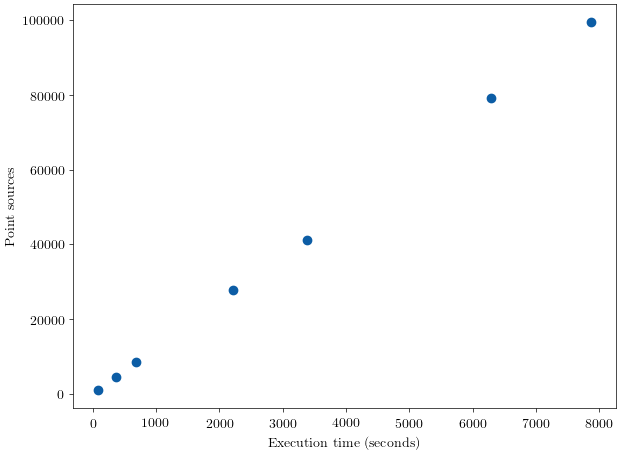

In [27]:
plt.scatter(execution_times_samples, point_source_count_samples)
plt.xlabel('Execution time (seconds)')
plt.ylabel('Point sources')

In [23]:
# combine into tuple
grid_data = np.column_stack((point_source_count_grid, execution_times_grid))
sample_data = np.column_stack((point_source_count_samples, execution_times_samples))
total_data = np.concatenate([grid_data, sample_data])

Text(0, 0.5, 'Point sources')

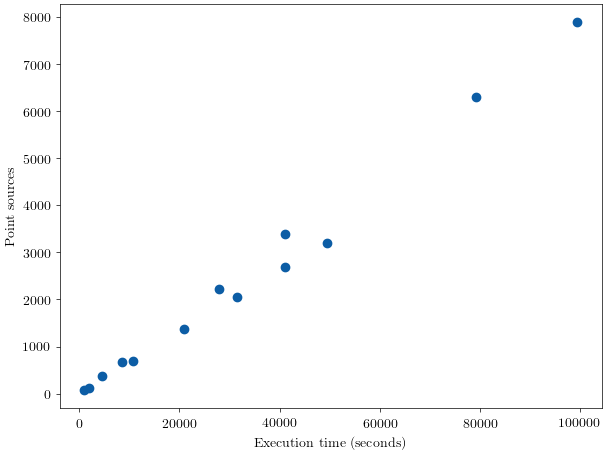

In [28]:
plt.scatter(total_data[:,0], total_data[:,1])
plt.xlabel('Execution time (seconds)')
plt.ylabel('Point sources')

 
0.07847 x - 131.6


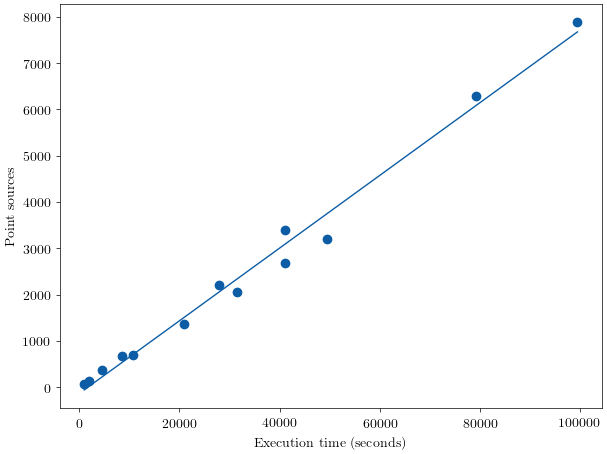

In [31]:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
model = np.poly1d(np.polyfit(total_data[:,0], total_data[:,1], 1))
poly_x = np.linspace(min(total_data[:,0]), max(total_data[:,0]), 100)

print(model)

plt.scatter(total_data[:,0], total_data[:,1])
plt.plot(poly_x, model(poly_x))
plt.xlabel('Execution time (seconds)')
plt.ylabel('Point sources')
plt.show()